Data: [SOCR](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

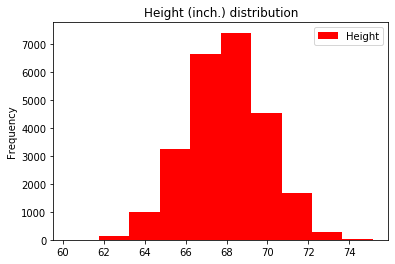

In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


data = pd.read_csv('data.csv', index_col='Index')

data.plot(y='Height', kind='hist', color='red',  title='Height (inch.) distribution')

In [12]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


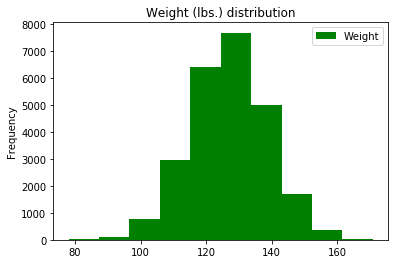

In [13]:
data.plot(y='Weight', kind='hist', color='green', title='Weight (lbs.) distribution')

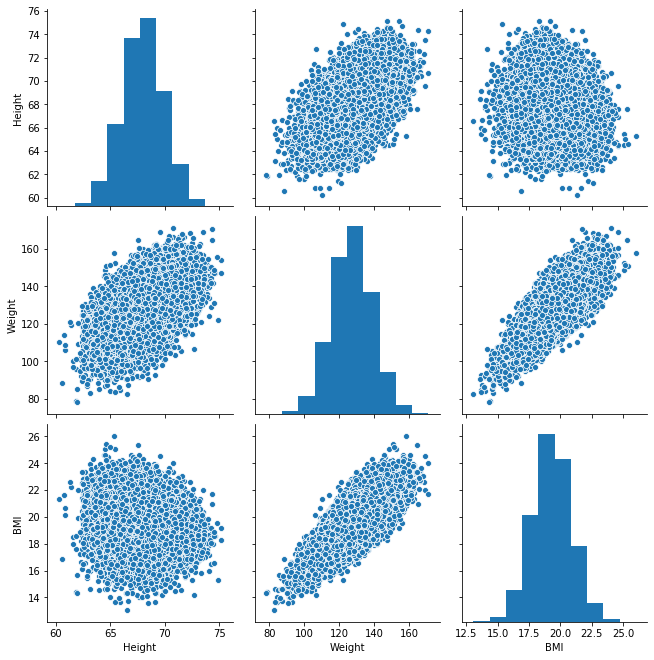

In [15]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)


sns.pairplot(data, size=3)
plt.show()

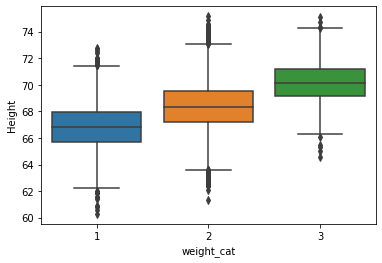

In [16]:
def weight_category(weight):
    pass
    if weight < 120:
        return '1'
    elif weight >= 150:
        return '3'
    else:
        return '2'
    
data['weight_cat'] = data['Weight'].apply(weight_category)

sns.boxplot(y=data['Height'], x=data['weight_cat'])
plt.show()

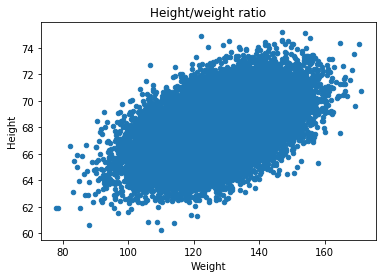

In [18]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height/weight ratio')

In [20]:
def squaredErr(w1, w0 = 50):
    err = ((data['Height'] - (w0 + w1 * data['Weight']))**2).sum()
    return(err)

$$error(w_0, w_1) = \sum_{i=1}^n {(y_i - (w_0 + w_1 * x_i))}^2 $$

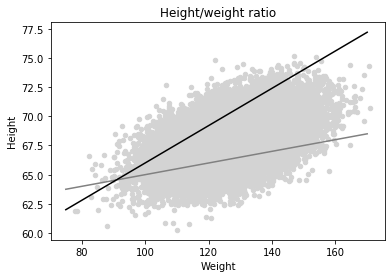

In [21]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height/weight ratio', color='lightgray')
x = np.linspace(75, 170, 100)

plt.plot(x, 60 + 0.05*x, 'gray')
plt.plot(x, 50 + 0.16*x, 'black')

plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

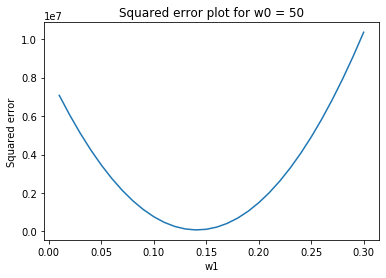

In [23]:
# w0 = 50

w1_range = np.linspace(0.01, 0.3, 30)
err_range = list(map(squaredErr, w1_range))

plt.plot(w1_range, err_range)
plt.xlabel('w1')
plt.ylabel('Squared error')
plt.title('Squared error plot for w0 = 50')
plt.show()

In [24]:
from scipy.optimize import minimize_scalar

w1_opt = minimize_scalar(squaredErr, bounds = (-5, 5)).x
print(w1_opt)

0.1410920372883438


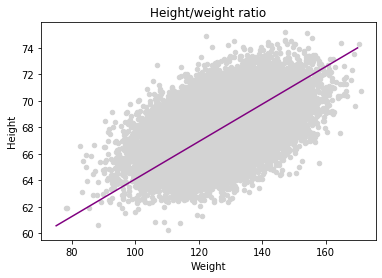

In [25]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height/weight ratio', color='lightgray')
# x = np.linspace(75, 170, 100)

plt.plot(x, 50 + w1_opt * x, 'purple')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

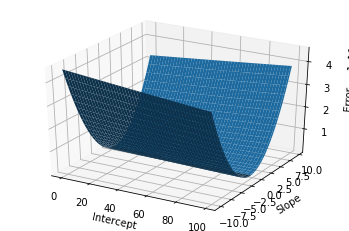

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.gca(projection='3d')

w0 = np.arange(0, 100, 1)
w1 = np.arange(-10, 10, 0.5)
w0, w1 = np.meshgrid(w0, w1)
err = np.vectorize(squaredErr)
Z = err(w1, w0)

surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [32]:
# (0, 0) - initial guess

from scipy.optimize import minimize

def vect_err(w):
    return squaredErr(w[0], w[1])

min = minimize(vect_err, [0, 0], method = 'L-BFGS-B', bounds = ((-5, 5), (-100, 100))).x
print(min)

[ 0.08200637 57.57179162]


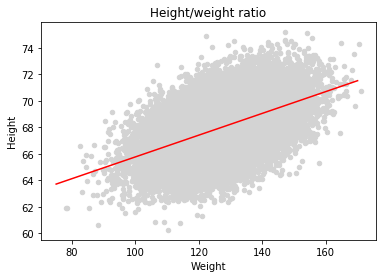

In [33]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height/weight ratio', color='lightgray')
# x = np.linspace(75, 170, 100)

plt.plot(x, min[1] + min[0] * x, 'r')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()